<Strong><h1>Exemplo de SVM</h1></Strong>

In [74]:
# Importando bibliotecas padrão

import numpy as np # Valores numéricos
import seaborn as sns # Visualização
import pandas as pd # Dataframes
import matplotlib.pyplot as plt

# Coisas pra visualização ficar bunitinha (não precisa esquentar com isso)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import seaborn
seaborn.set() 

<Strong><h2>Dataset utilisado</h2></Strong>

<p>O dataset escolhido possui informações sobre a voz de um individuo e diz se essa voz é de um homem ou de uma mulher.</p>
<p>Os dados utilizado são:</p>
<ul>
    <li>meanfreq: mean frequency (in kHz)</li>
    <li>sd: standard deviation of frequency</li>
    <li>median: median frequency (in kHz)</li>
    <li>Q25: first quantile (in kHz)</li>
    <li>Q75: third quantile (in kHz)</li>
    <li>IQR: interquantile range (in kHz)</li>
    <li>skew: skewness (see note in specprop description)</li>
    <li>kurt: kurtosis (see note in specprop description)</li>
    <li>sp.ent: spectral entropy</li>
    <li>sfm: spectral flatness</li>
    <li>mode: mode frequency</li>
    <li>centroid: frequency centroid (see specprop)</li>
    <li>peakf: peak frequency (frequency with highest energy)</li>
    <li>meanfun: average of fundamental frequency measured across acoustic signal</li>
    <li>minfun: minimum fundamental frequency measured across acoustic signal</li>
    <li>maxfun: maximum fundamental frequency measured across acoustic signal</li>
    <li>meandom: average of dominant frequency measured across acoustic signal</li>
    <li>mindom: minimum of dominant frequency measured across acoustic signal</li>
    <li>maxdom: maximum of dominant frequency measured across acoustic signal</li>
    <li>dfrange: range of dominant frequency measured across acoustic signal</li>
    <li>modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range</li>
    <li>label: male or female</li>
</ul>

In [75]:
df = pd.read_csv('./data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


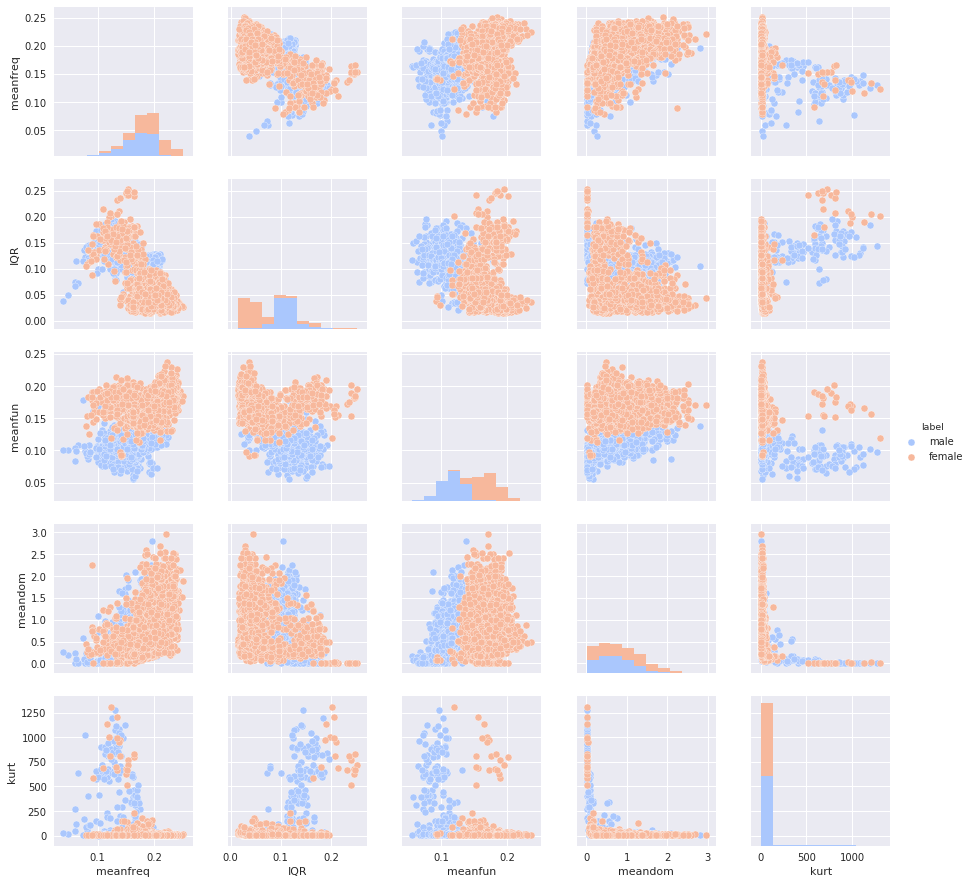

In [76]:
sns.pairplot(df[['meanfreq', 'IQR', 'meanfun',
        'meandom', 'kurt','label']], hue='label', palette="coolwarm")

In [77]:
df_selected = df[['meanfreq', 'IQR', 'meanfun',
        'meandom', 'kurt', 'label']]
df_selected.head()

,meanfreq,IQR,meanfun,meandom,kurt,label
0,0.059781,0.075122,0.084279,0.007812,274.402906,male
1,0.066009,0.073252,0.107937,0.009014,634.613855,male
2,0.077316,0.123207,0.098706,0.007990,1024.927705,male
3,0.151228,0.111374,0.088965,0.201497,4.177296,male
4,0.135120,0.127325,0.106398,0.712812,4.333713,male


In [78]:
# encode "label"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df_selected.label=labelEncoder_X.fit_transform(df_selected.label)

df_selected.head()

,meanfreq,IQR,meanfun,meandom,kurt,label
0,0.059781,0.075122,0.084279,0.007812,274.402906,1
1,0.066009,0.073252,0.107937,0.009014,634.613855,1
2,0.077316,0.123207,0.098706,0.007990,1024.927705,1
3,0.151228,0.111374,0.088965,0.201497,4.177296,1
4,0.135120,0.127325,0.106398,0.712812,4.333713,1


In [79]:
from sklearn import svm
C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)

In [80]:
y = df_selected['label']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [81]:
x = df_selected.drop(['label'], axis=1)
x.head()

,meanfreq,IQR,meanfun,meandom,kurt
0,0.059781,0.075122,0.084279,0.007812,274.402906
1,0.066009,0.073252,0.107937,0.009014,634.613855
2,0.077316,0.123207,0.098706,0.007990,1024.927705
3,0.151228,0.111374,0.088965,0.201497,4.177296
4,0.135120,0.127325,0.106398,0.712812,4.333713


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)

In [83]:
clf.fit(x_train, y_train)
pred_y = clf.predict(x_test)
pred_y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [84]:
y_test.values

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,

In [85]:
clf.score(x_test,y_test)

0.9085173501577287

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y, target_names=['male', 'female']))

              precision    recall  f1-score   support

        male       0.97      0.85      0.91       500
      female       0.85      0.98      0.91       451

    accuracy                           0.91       951
   macro avg       0.91      0.91      0.91       951
weighted avg       0.92      0.91      0.91       951



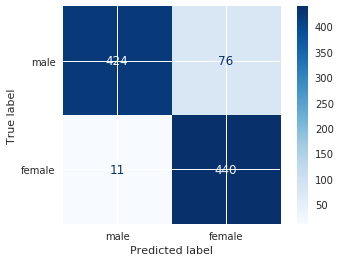

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues, display_labels=['male', 'female'])
plt.show()

In [88]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy', n_jobs = -1)
scores

array([0.8044164 , 0.89432177, 0.97476341, 0.99052133, 0.91943128])

In [89]:
print("Accuracy: %0.2f" % (scores.mean()))

Accuracy: 0.92


# EXTRA -- GRIDSEARCH CV

In [90]:
from sklearn.model_selection import GridSearchCV
#array_aux = []
#for i in range(200):
#    array_aux.append(i)
param_grid = {
    'kernel':['linear', 'poly'],
    'C': [C]
}
svm = svm.SVC()
# cv = n-cross-validation
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(x_train, y_train)

print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   16.1s remaining:   16.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   27.4s finished


Melhores parametros = 
 {'C': 1.0, 'kernel': 'linear'}

Melhor pontuação: 
 0.9170049616599009
